In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer

In [59]:
df = pd.read_csv('../train.csv',usecols=['Age','Fare','Survived'])

In [60]:
df.dropna(inplace=True)

In [61]:
df.shape

(714, 3)

In [62]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [63]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [64]:
X = df.iloc[:,1:]
Y = df.iloc[:,0]

In [65]:
clf = DecisionTreeClassifier()

In [66]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2,random_state=42)

In [67]:
clf = DecisionTreeClassifier()

In [68]:
clf.fit(X_train,Y_train)
Y_pred = clf.predict(X_test)

In [69]:
accuracy_score(Y_test,Y_pred)

0.6363636363636364

In [70]:
np.mean(cross_val_score(DecisionTreeClassifier(),X,Y,cv=10,scoring='accuracy'))

0.6372848200312988

In [71]:
kbin_age = KBinsDiscretizer(n_bins=15,encode='ordinal',strategy='kmeans', subsample=None)
kbin_fare = KBinsDiscretizer(n_bins=15,encode='ordinal',strategy='kmeans', subsample=None)


In [72]:
trf = ColumnTransformer([
    ('first',kbin_age,[0]),
    ('second',kbin_fare,[1])
])

In [73]:
X_train_trf = trf.fit_transform(X_train)
X_test_trf = trf.transform(X_test)

In [74]:
trf.named_transformers_


{'first': KBinsDiscretizer(encode='ordinal', n_bins=15, strategy='kmeans', subsample=None),
 'second': KBinsDiscretizer(encode='ordinal', n_bins=15, strategy='kmeans', subsample=None)}

In [75]:
#n_bins_ defines the no. of arrays created 
trf.named_transformers_['first'].n_bins_

array([15])

In [76]:
trf.named_transformers_['second'].n_bins_

array([15])

In [77]:
#bin_edges_ defines the range that are created
trf.named_transformers_['first'].bin_edges_

array([array([ 0.42      ,  5.27754049, 11.74158654, 17.35243056, 21.55720029,
              26.64837093, 32.14464286, 37.41916667, 42.9025    , 48.1075    ,
              53.110625  , 58.090625  , 62.3875    , 67.72916667, 75.54166667,
              80.        ])                                                   ],
      dtype=object)

In [78]:
trf.named_transformers_['second'].bin_edges_

array([array([  0.        ,  11.24103919,  19.86871564,  28.06543126,
               34.90886516,  45.73788324,  59.33660546,  72.27252098,
               84.10950431, 101.00790682, 123.56362348, 144.756475  ,
              185.67419167, 237.86718333, 385.651575  , 512.3292    ])],
      dtype=object)

In [79]:
output = pd.DataFrame({
    'age':X_train['Age'],
    'age_trf':X_train_trf[:,0],
    'fare':X_train['Fare'],
    'fare_trf':X_train_trf[:,1]
})

In [80]:
output['fare_trf'].value_counts()

fare_trf
0.0     208
1.0     104
2.0      83
3.0      35
5.0      29
7.0      29
4.0      18
8.0      12
6.0      12
9.0      11
11.0      9
13.0      8
10.0      6
12.0      6
14.0      1
Name: count, dtype: int64

In [81]:
output['age_labels'] = pd.cut(x=X_train['Age'],bins = trf.named_transformers_['first'].bin_edges_[0].tolist())
output['fare_labels'] = pd.cut(x = X_train['Fare'], bins=trf.named_transformers_['second'].bin_edges_[0].tolist())

In [82]:
output.sample(5)

,age,age_trf,fare,fare_trf,age_labels,fare_labels
387,36.0,6.0,13.000,1.0,"(32.145, 37.419]","(11.241, 19.869]"
641,24.0,4.0,69.300,6.0,"(21.557, 26.648]","(59.337, 72.273]"
148,36.5,6.0,26.000,2.0,"(32.145, 37.419]","(19.869, 28.065]"
595,36.0,6.0,24.150,2.0,"(32.145, 37.419]","(19.869, 28.065]"
311,18.0,3.0,262.375,13.0,"(17.352, 21.557]","(237.867, 385.652]"


In [83]:
clf =DecisionTreeClassifier()
clf.fit(X_train_trf,Y_train)
y_pred2 = clf.predict(X_test_trf)

In [84]:
accuracy_score(Y_test,y_pred2)

0.6433566433566433

In [86]:
X_trf =trf.fit_transform(X)
np.mean(cross_val_score(DecisionTreeClassifier(),X,Y,cv=10,scoring='accuracy'))

0.6303403755868545

In [97]:
def discretize(bins, startegy):
    kbin_age = KBinsDiscretizer(n_bins=bins, encode='ordinal',strategy=startegy, subsample=None)
    kbin_fare = KBinsDiscretizer(n_bins=bins, encode='ordinal',strategy=startegy, subsample=None)
    
    trf = ColumnTransformer([
        ('first',kbin_age,[0]),
        ('second',kbin_fare,[1]),
    ])
    X_trf = trf.fit_transform(X)
    print(np.mean(cross_val_score(DecisionTreeClassifier(),X,Y,cv=10,scoring='accuracy')))
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(X['Age'])
    plt.title("Before Age")

    plt.subplot(122)
    plt.hist(X_trf[:,0],color='red')
    plt.title("After Age")

    plt.show()
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(X['Fare'])
    plt.title("Before Fare")

    plt.subplot(122)
    plt.hist(X_trf[:,1],color='red')
    plt.title("After Fare")

    plt.show()

0.6303208137715179


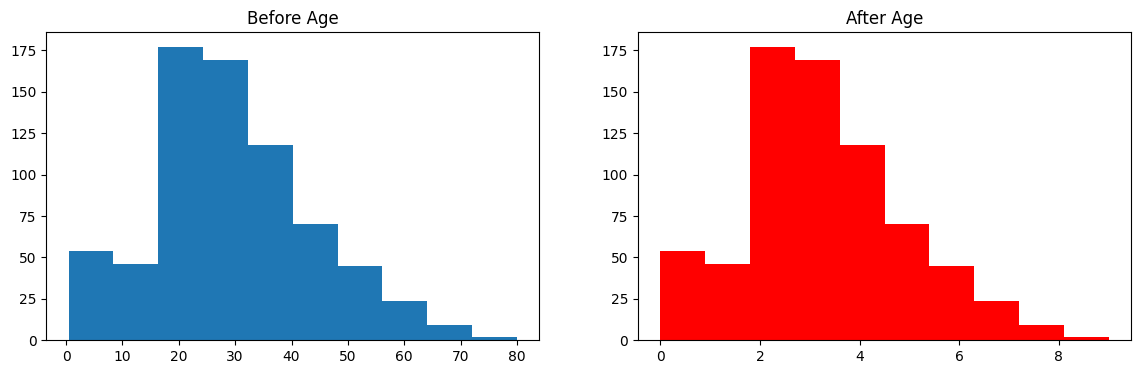

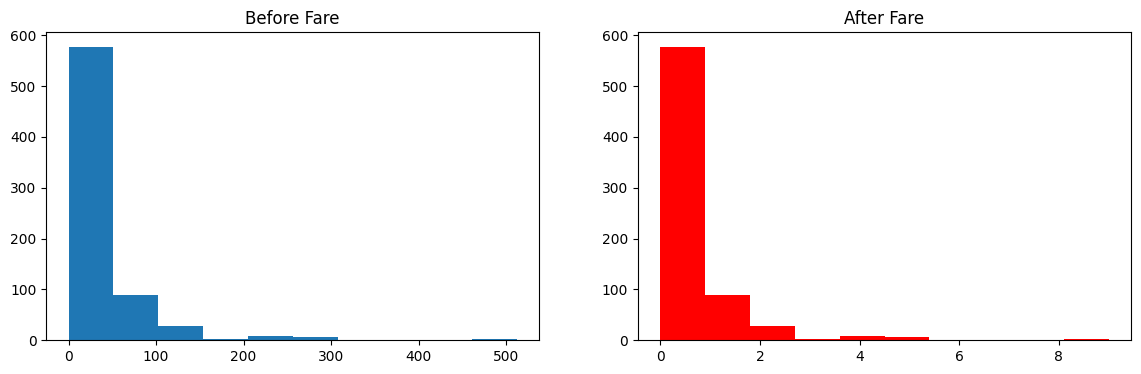

In [100]:
discretize(10,'uniform')
